# **MatplotLib First Steps**

### A.J. Zerouali (21/07/14)

My first steps in MatPlotLib. Will follow:

- Pierian Data's lectures in Section 8 of DSML course (Lects. 40-46).

- Lazy Programmer's Section 3 of "Numpy stack - Deep Learning Prerequisites"


The DSML course has several sections on data visualization (Secs. 9-12, MatplotLib, Seaborn, Pandas, Plotly and Cufflinks). The most important library for visualization in data science seems to be MatplotLib and seems to be close to Matlab's plotting capabilities.

A useful comment from Portilla is that MatplotLib has an actively maintained official website with good documentation of the packages/functions and example code. If one seeks to make a particular type of graph, one can look at the gallery:

https://matplotlib.org/stable/gallery/index.html

which shows a collection of graph types and gives example code of how to obtain them.

**Comments:**

- Portilla mentions in Lect. 44 that for data visualization, the DSML course will mostly use the Seaborn library, since it's better suited for statistical plots.

- When saving the notebook to pdf, the figures created by cells are not displayed.

- These notes were last modified on 2021/07/18.

___________________________________________

## **Contents**

1) Functional plotting

2) Object oriented plotting

3) Saving figures

4) Figure appearance

5) Scatter plots (Example)

6) Histograms (Example)

7) Plotting images (Example)


In [1]:
# Import Numpy and Pandas
import numpy as np
import pandas as pd

The import is done as follows, and the line below makes it possible to display the plots in Jupyter:

In [2]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
# Display in Jupyter
%matplotlib inline

When running .py scripts in the cmd, will have to use **plt.show()** to display plots.

__________________________________________

There are two ways of creating plots in MatplotLib: the object oriented approach and the functional approach.

# (1) **Functional plotting:**

The functional method is the similar to what we did in the Matlab prompt, and uses **plt.plot(*x vector*, *y vector*, *options*)**.

In [3]:
# Take points on an interval and make array of images under some function
pi = np.pi
x= np.linspace(-pi,pi,20)
y = np.sin(x)

Text(0.5, 1.0, 'Graph of y=sin(x)')

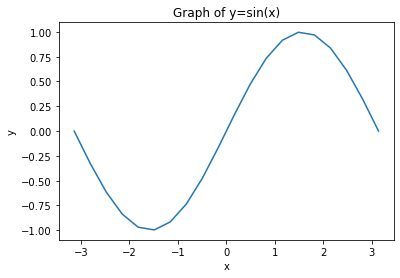

In [12]:
# Plot the graph y=f(x)
plt.plot(x,y)
# Add axes labels and title of graph
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y=sin(x)')


(Why did I miss these graphs?)

Indeed, this is very close to the basic Matlab plotting, including curve styles, colors etc. 

Next, if we want to make several plots on the same canvas, we need to define them as subplots. The latter are defined using **plt.subplot(*rows*,*columns*,*subplot position*)**

In [4]:
# Add the function cos(x)
z = np.cos(x)

Text(0.5, 1.0, 'cos(x)')

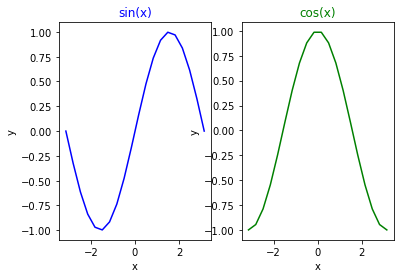

In [19]:
# Declare the subplots
# sin
plt.subplot(1,2,1)
plt.plot(x,y,'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin(x)', color = 'b')

# cos
plt.subplot(1,2,2)
plt.plot(x,z,'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('cos(x)', color = 'g')

If we want both in the same figure (not separate), we don't declare them as subplots:

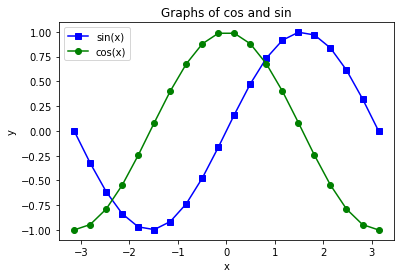

In [56]:
# Both graphs, this time with a legend and labels for each graph 
# sin
plt.plot(x,y,'bs-', label='sin(x)')
# cos
plt.plot(x,z,'go-', label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphs of cos and sin')
plt.legend()

The point of the functional plotting is that we manipulating one graph online, and adding instructions to **one** figure (axis labels, graphs, subdividing into other plots etc.). In fact, the functional approach is to manipulate **one figure object**.

# (2) **Object oriented plotting:** 

Here we use figure objects **plt.figure()** from MatplotLib. The syntax is not the same as in the functional approach, because it's not exactly the same class.

Below, we create a figure object, and add 2 sets of axes to it with:

**fig.add_axes([*left*, *bottom*, *width*, *height*])**

So the figure is the plotting space, and the axes specify the space in which a plot will fit. It's on the axes that apply the **.plot()** method, and now the labelling is done using **.set_xlabel(), .set_ylabel(), and .set_title()**. These add parameters to the canvas and the axes, and to display everything one calls the figure variable.

* In the next 2 examples, we create 2 plots on the same figure. Note the differences in positioning of the graphs (axes) resulting from the size and position parameters in **axes_2 = fig.add_axes([...])**.

Text(0.5, 1.0, 'y=cos(x)')

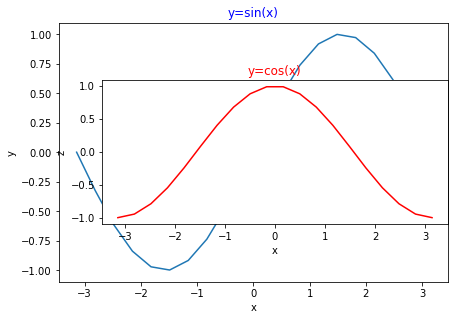

In [22]:
# Create figure object (Why does the help say it's a function)
fig = plt.figure()

# Add a set of axes
axes_1 = fig.add_axes([0.1,0.1,0.9,0.9])
axes_2 = fig.add_axes([0.2,0.3,0.8,0.5])

# Plot the sine function in axes_1
axes_1.plot(x,y)
axes_1.set_xlabel('x')
axes_1.set_ylabel('y')
axes_1.set_title('y=sin(x)', color='b')

# Plot cos in axes_2
axes_2.plot(x,z,'r')
axes_2.set_xlabel('x')
axes_2.set_ylabel('z')
axes_2.set_title('y=cos(x)', color='r')

Just to illustrate what the list in *.add_axes([...])* is referencing:

Text(0.5, 1.0, 'y=cos(x)')

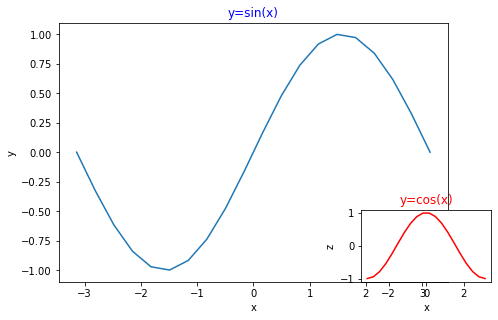

In [6]:
del fig

# Add a set of axes
fig = plt.figure()
axes_1 = fig.add_axes([0.1,0.1,0.9,0.9])
axes_2 = fig.add_axes([0.8,0.1,0.3,0.25])

# Plot the sine function in axes_1
axes_1.plot(x,y)
axes_1.set_xlabel('x')
axes_1.set_ylabel('y')
axes_1.set_title('y=sin(x)', color='b')

# Plot cos in axes_2
axes_2.plot(x,z,'r')
axes_2.set_xlabel('x')
axes_2.set_ylabel('z')
axes_2.set_title('y=cos(x)', color='r')

**Remark:** Note that if we just display the figure, all the graphs are shown. Furthermore, one needs to be careful in modifying the axes of a plot, the syntax is rather involved. We get the following warning when reusing axes:

*MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.*


* In the next example we make a more presentable/realistic plot. For add_axes():

**fig.add_axes([*Left*, *Bottom*, *Width*, *Height*])**

The *Left* and *Bottom* coordinates are of course w.r.t. the bottom left of the figure.

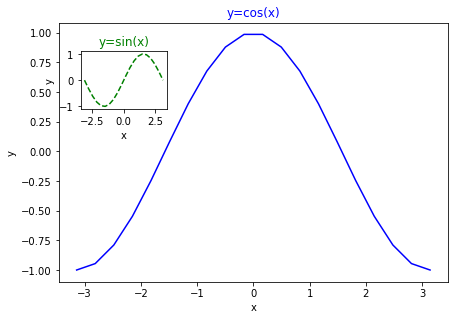

In [48]:
# create new figure
fig_2 = plt.figure()
# Add axes, smaller one at proper coordinates
ax21 = fig_2.add_axes([0, 0, 0.9, 0.9])
ax22 = fig_2.add_axes([0.05, 0.6, 0.2, 0.2])
# Add cos and labels to first (large) graph (Blue)
ax21.set_xlabel("x")
ax21.set_ylabel("y")
ax21.set_title("y=cos(x)", color='b')
ax21.plot(x,z,'b')
# Add sin and labels to first (small) graph (Green)
ax22.set_xlabel("x")
ax22.set_ylabel("y")
ax22.set_title("y=sin(x)", color='g')
ax22.plot(x,y,'g--')

In [31]:
# delete the figures
del fig
del fig_2

* **Subplots in object oriented plotting:**

* Below, we create a new figure and define equally distanced figures. Note the **.tight_layout()** call, without which the subplots overlap.

**Comment:** *Again, there's no systematic discussion of how these objects work in the course...*

<Figure size 432x288 with 0 Axes>

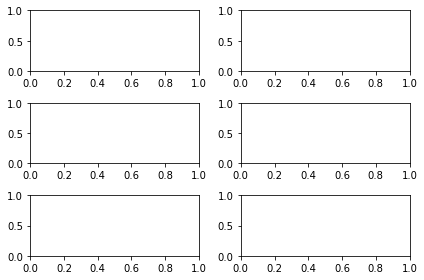

In [33]:
# create new figure
fig = plt.figure()

axes = plt.subplots(3,2)
plt.tight_layout()

In [34]:
del fig

The above is just to give an idea of what **plt.subplots(*size*)** does. 

* Next, let's replot cos(x) and sin(x). Here we use **plt.subplots(*nrows*, *ncols*)** as below, which will automatically add axes to *fig* with the following call:

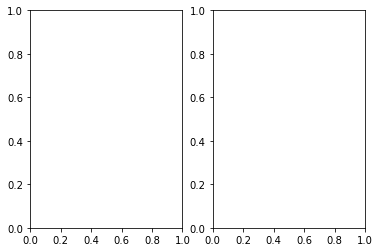

In [35]:
# Create figure
fig, axes = plt.subplots(1,2)


The variable *axes* above is a list of axes (subplots), and we add plots/labels to it as follows:

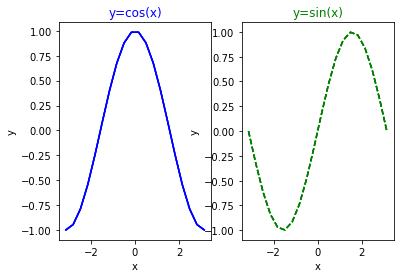

<Figure size 432x288 with 0 Axes>

In [40]:
# Left graph
axes[0].set_title("y=cos(x)", color='b')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].plot(x,z,'b')

# Right graph
axes[1].set_title("y=sin(x)", color='g')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].plot(x,y,'g--')

plt.tight_layout()
fig

# (3) **Saving figures:**

This is tpwards the 2/3 of Lecture 43. Matplotlib can save figure in a variety of formats (png, jpeg, pdf etc.), which are specified directly in the filename. This is done using the instruction:

***fig_name*.savefig('*file_name*.*format*', dpi=*resolution*)**

DPI stands for *dots per inch* (see next section).

In [50]:
# Save "fig_2" of previous section in png:
fig_2.savefig('sin_cos_no_subplots.png',dpi=64)
# Save last "fig" with subplots of previous section in jpeg:
fig.savefig('sin_cos_subplots.jpeg',dpi=64)

Without subplots (note issues with axes of larger plot):

<img  src="sin_cos_no_subplots.png">

With subplots:

<img  src="sin_cos_subplots.jpeg">

# (4) **Figure appearance:**

The points discussed here are dicussed in Lecture 43 (Pierian Data's DSML Boorcamp, Section 8).

**Figure size and resolution**

* When creating a figure object, one can specify the size in inches: **plt.figure(figsize = (*Width*, *Height*))**

In [51]:
del fig

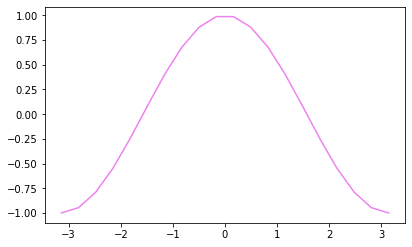

In [55]:
fig = plt.figure(figsize = (5, 3))
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(x,z,'violet')

One can also resize a figure using the method **set_size_inches(*Width*, *Height)**:

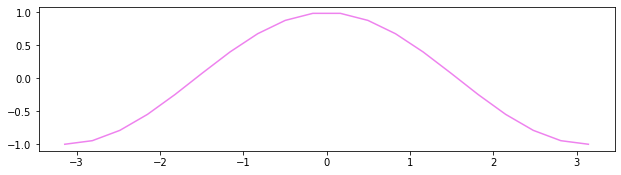

In [57]:
fig.set_size_inches(8,2)
fig

* Another parameter of creating a figure is its resolution, or DPI (dots per inches). This is specified with **plt.figure(dpi=*Resolution*)**.

**Legends**

Particularly useful when having more than one graph in one axis variable. We illustrated this in the last figure of the functional plotting section, now we formalize it a little more.

* The key to adding a legend is labelling each graph using ***ax_var*.plot(*x*,*y*, label= *legend entry*)**. To display the legend, one calls **plt.legend(loc = *location*)** *before* the figure variable.

In [66]:
del fig

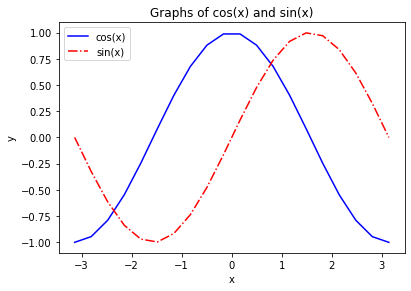

In [77]:
# Basics
fig = plt.figure()
axes = fig.add_axes([0,0,0.8,0.8])
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Graphs of cos(x) and sin(x)')



# Plot 2 functions
axes.plot(x,z, label = 'cos(x)', color = 'b')
axes.plot(x,y, label = 'sin(x)', color = 'r', ls = '-.')

plt.legend()

* By default, loc = 0 which is "best", and from the help file we have the following table of values:

            ===============   =============
            Location String   Location Code
            ===============   =============
            'best'            0
            'upper right'     1
            'upper left'      2
            'lower left'      3
            'lower right'     4
            'right'           5
            'center left'     6
            'center right'    7
            'lower center'    8
            'upper center'    9
            'center'          10
            ===============   =============
            
Alternatively, one can also specify the coordinates of the legend with a tuple.

* In the next example, we change the location of the legend on the figure. 

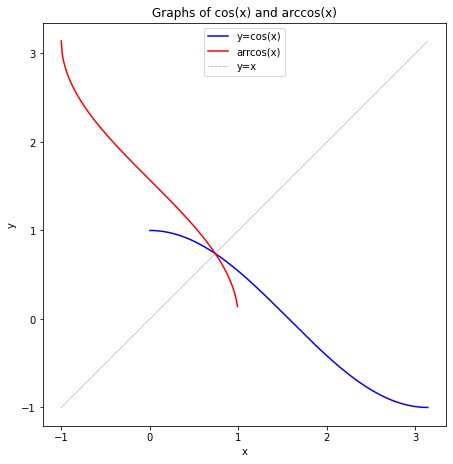

In [100]:
# Initializations
t_c = np.arange(0,pi,0.01)
t_a = np.arange(-1,1,0.01)
fig_2 = plt.figure(figsize=(7,7))
ax= fig_2.add_axes([0,0,0.8,0.8])

# Figure labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Graphs of cos(x) and arccos(x)')

# Plots
ax.plot(t_c,np.cos(t_c), color = 'b', label = 'y=cos(x)')
ax.plot(t_a,np.arccos(t_a), color = 'r', label = 'arrcos(x)')
ax.plot(np.arange(-1,pi,0.01), np.arange(-1,pi,0.01), color = 'black', label = 'y=x', ls ='dotted' , lw = 0.5)

plt.legend(loc = 9)

**Graph appearance**

Here we discuss some of the parameters in ***axis_var*.plot()**. from the help:

**- Colors**

Specified using **color=**. The supported color abbreviations are the single letter codes:
    
    =============    ===============================
    character        color
    =============    ===============================
    ``'b'``          blue
    ``'g'``          green
    ``'r'``          red
    ``'c'``          cyan
    ``'m'``          magenta
    ``'y'``          yellow
    ``'k'``          black
    ``'w'``          white
    =============    ===============================

**- Line width and transparency**

The line width using **lw=** or **linewidth**. The default is 1, and the given value makes it thinner or wider. For the transparency, the argument is **alpha=**, with default 1 (max opacity).


**- Line Styles**

Specified using **ls=** or **linestyle**.
    
    =============    ===============================
    character        description
    =============    ===============================
    ``'-'``          solid line style
    ``'--'``         dashed line style
    ``'-.'``         dash-dot line style
    ``':'``          dotted line style
    =============    ===============================
    
    Example format strings::
    
        'b'    # blue markers with default shape
        'or'   # red circles
        '-g'   # green solid line
        '--'   # dashed line with default color
        '^k:'  # black triangle_up markers connected by a dotted line


**- Markers**

Specified using **marker=**, which marks the points of the arrays plotted with specific characters. Note that these markers can be further customized (edge width, edge color, fill etc.).

    =============    ===============================
    character        description
    =============    ===============================
    ``'.'``          point marker
    ``','``          pixel marker
    ``'o'``          circle marker
    ``'v'``          triangle_down marker
    ``'^'``          triangle_up marker
    ``'<'``          triangle_left marker
    ``'>'``          triangle_right marker
    ``'1'``          tri_down marker
    ``'2'``          tri_up marker
    ``'3'``          tri_left marker
    ``'4'``          tri_right marker
    ``'s'``          square marker
    ``'p'``          pentagon marker
    ``'*'``          star marker
    ``'h'``          hexagon1 marker
    ``'H'``          hexagon2 marker
    ``'+'``          plus marker
    ``'x'``          x marker
    ``'D'``          diamond marker
    ``'d'``          thin_diamond marker
    ``'|'``          vline marker
    ``'_'``          hline marker
    =============    ===============================
    

**- Ranges of x and y axes**

Among other things, setting smaller ranges for the value contained in plotted arrays allows one to zoom-in on sections of graphs. This is done using the commands:

*  ***axis_var*.set_xlim([*value range*])**

*  ***axis_var*.set_ylim([*value range*])**



# (5) **Scatter plots:**

This is from Lect. 13 of Lazy Programmer's "Numpy stack" course. Scatter plots are useful when trying to visualize clustered data for instance. We first create some random graph, and then we call **plt.scatter()**. (No figure objects here for now).

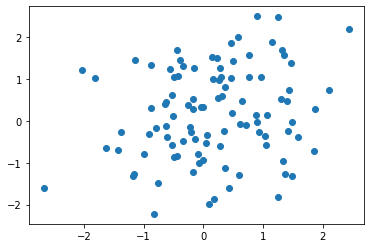

In [4]:
X = np.random.randn(100,2)
plt.scatter(X[:,0], X[:,1])

One of the useful functionalities of .scatter() is that it can take in a color argument to label the points on scatter plot. In the next example: 

- We'll create a random 150x2 array (normally distributed).

- We'll shift the center of each batch of 50 points of the above array (making new centers of the 3 clusters).

- We'll assign different colors to each batch.

The colors are passed using the "c" argument in scatter(): **plt.scatter(*X-vector*, *Y-vector*, c=*color array*)**

In [19]:
X = np.random.randn(150,2)

In [20]:
# Center the first 50 at (-1,-0.5)
X[:50,0] += (-1)
X[:50,1] += (-0.5)
# Center next 50 points at (0.5,1)
X[50:100,0] += 0.5
X[50:100,1] += 1
# Center last 50 points at (2,-2)
X[100:,0] += 2
X[100:,1] += (-2)



In [21]:
Y =np.zeros(150)

In [22]:
Y[50:100] = np.ones(50)
Y[100:] = 2*np.ones(50)

Text(0.5, 1.0, 'Fake clustered data')

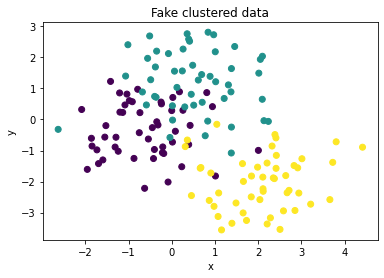

In [25]:
# Main instruction:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fake clustered data')

# (6) **Histograms:**

This is from Lect. 14 of Lazy Programmer's "Numpy stack" course. As one would expect, a histograms are used to plot the distribution of samples from statistical measurements. Histograms are made with **plt.hist(*Data*,bins)**, where **bins** refers to the number of subintervals of samples

Just for fun, I'll use a Numpy random generator other than the normal, the Weibull distribution (https://en.wikipedia.org/wiki/Weibull_distribution). A list of full distributions of the random generators in numpy.random can be found at: https://numpy.org/doc/1.16/reference/routines.random.html.


In [16]:
X_wei_1 = np.random.weibull(a= 3/2, size=10000)
X_wei_2 = np.random.weibull(a= 2, size=10000)

(array([263., 438., 565., 585., 646., 609., 625., 617., 582., 506., 526.,
        468., 378., 395., 391., 305., 280., 251., 240., 205., 178., 146.,
        114.,  86.,  84.,  78.,  84.,  55.,  60.,  45.,  43.,  26.,  22.,
         18.,  19.,  11.,  11.,  13.,  13.,   4.,   6.,   5.,   2.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([2.88963719e-03, 8.75402766e-02, 1.72190916e-01, 2.56841556e-01,
        3.41492195e-01, 4.26142834e-01, 5.10793474e-01, 5.95444113e-01,
        6.80094753e-01, 7.64745392e-01, 8.49396032e-01, 9.34046671e-01,
        1.01869731e+00, 1.10334795e+00, 1.18799859e+00, 1.27264923e+00,
        1.35729987e+00, 1.44195051e+00, 1.52660115e+00, 1.61125179e+00,
        1.69590243e+00, 1.78055307e+00, 1.86520370e+00, 1.94985434e+00,
        2.03450498e+00, 2.11915562e+00, 2.20380626e+00, 2.28845690e+00,
        2.37310754e+00, 2.45775818e+00, 2.54240882e+00, 2.62705946e+00,
        2.71171010e+00, 2.79636074e+00, 2.88101138e+00, 2.96566202e+00,
        3.

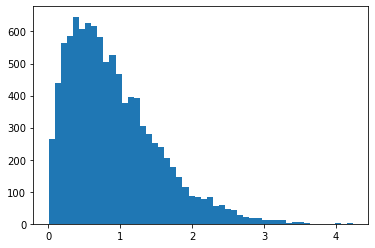

In [17]:
plt.hist(X_wei_1,bins=50)

(array([ 31.,  90., 201., 244., 303., 354., 422., 428., 446., 477., 469.,
        514., 502., 486., 502., 473., 481., 430., 400., 359., 339., 323.,
        239., 212., 195., 187., 160., 137., 105.,  93.,  90.,  57.,  57.,
         41.,  34.,  31.,  24.,  15.,   9.,  13.,   3.,   5.,   3.,   5.,
          5.,   1.,   1.,   1.,   1.,   2.]),
 array([1.05520266e-03, 6.03726605e-02, 1.19690118e-01, 1.79007576e-01,
        2.38325034e-01, 2.97642492e-01, 3.56959950e-01, 4.16277408e-01,
        4.75594866e-01, 5.34912324e-01, 5.94229781e-01, 6.53547239e-01,
        7.12864697e-01, 7.72182155e-01, 8.31499613e-01, 8.90817071e-01,
        9.50134529e-01, 1.00945199e+00, 1.06876944e+00, 1.12808690e+00,
        1.18740436e+00, 1.24672182e+00, 1.30603928e+00, 1.36535673e+00,
        1.42467419e+00, 1.48399165e+00, 1.54330911e+00, 1.60262657e+00,
        1.66194402e+00, 1.72126148e+00, 1.78057894e+00, 1.83989640e+00,
        1.89921385e+00, 1.95853131e+00, 2.01784877e+00, 2.07716623e+00,
        2.

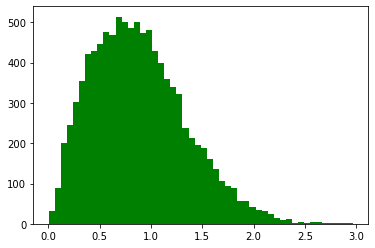

In [21]:
plt.hist(X_wei_2,bins=50, histtype = 'barstacked',color= 'g')

# (7) **Plotting images:**

This is from Lect. 15 of Lazy Programmer's "Numpy stack" course.

For machine learning applications, images are usually stored as tensors, i.e. as Numpy arrays, as opposed to png/bmp/jpg binaries. The first task is to import the Pillow Library in Python:

https://pillow.readthedocs.io/en/stable/

This library is for image processing using the Python interpreter.

In [3]:
from PIL import Image

First we load an image and convert it to an array:

In [4]:
img_png = Image.open("Beckman_JNDiaye_21.png")
img_arr = np.array(img_png)

The variable *img_arr* now stores a 948x908 pixels image, with each pixel having RGB + opacity channels (hence the 4 coordinates).

In [105]:
img_arr.shape

(948, 908, 4)

Displaying an image is done using **plt.imshow(*image_array*)** with Matloblib:

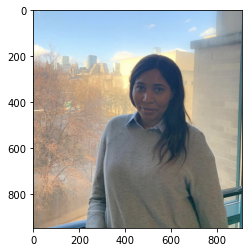

In [5]:
plt.imshow(img_arr)

One can also display images in grayscale. This can be done by taking the average over the pixel channels (we take **img_arr.mean(axis=2)** below). By default, plt returns a heat map (which is why the first figure below is yollow/green). To get actual grayscale, one specifies **cmap= gray**.

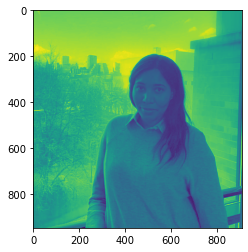

In [6]:
plt.imshow(img_arr.mean(axis=2))

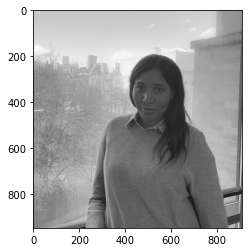

In [9]:
plt.imshow(img_arr.mean(axis=2), cmap = "gray")